In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.


LOAD DATASETS

In [4]:
true_news = pd.read_csv(r'C:\Users\HP\Desktop\True.csv')

In [6]:
fake_news = pd.read_csv(r"C:\Users\HP\Desktop\Fake.csv")

THE FIRST FEW ROWS OF THE TRUE STORIES AS FOLLOWS

In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


FIRST FEW ROWS OF THE FALSE STORIES

In [7]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
 #Creating "category" on dataframes that will be the target feature

true_news['category'] = 'TRUE'
fake_news['category'] = 'FAKE'


In [9]:
true_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [10]:
fake_news.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [11]:
true_news.describe()

,title,text,subject,date,category
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",TRUE
freq,14,8,11272,182,21417


In [12]:
fake_news.describe()

,title,text,subject,date,category
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",FAKE
freq,6,626,9050,46,23481


WE CREATE ONE BIG DATAFRAME CONTAINING BOTH REAL AND FAKE STORIES, WITH A COLOUMN NAMED 'CATEGORY' THAT LABELS EACH TYPE RESPECTIVELY

In [13]:
#We combine both dataframes

news_data =pd.concat([true_news, fake_news])


In [14]:
news_data.head(20)

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",TRUE
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",TRUE
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",TRUE


In [15]:
#Lets shaffle to see some fakes

news_data.sample(frac = 1)

,title,text,subject,date,category
7582,President Obama Laughs After Being Told Repub...,President Zero F*cks Left Obama strikes agai...,News,"March 10, 2016",FAKE
20544,Angola's opposition appeals election results,LUANDA (Reuters) - Angola s main opposition pa...,worldnews,"September 9, 2017",TRUE
2807,Google CEO SHREDS Trump’s Immigration Ban For...,Donald Trump s ban on Muslims emigrating to th...,News,"January 28, 2017",FAKE
10424,WATCH: ONE WOMAN Reports The Weather In Sweden...,Paul Joseph Watson (@PrisonPlanet on Twitter) ...,politics,"Jul 11, 2017",FAKE
17104,[VIDEO] FLASHBACK TO THE LIE ABOUT THE VIDEO O...,"#NeverForget Sean Smith, Tyrone Woods, Chris D...",Government News,"Sep 11, 2015",FAKE
...,...,...,...,...,...
12241,Peru's Kuczynski says will not resign over Ode...,LIMA (Reuters) - Peruvian President Pedro Pabl...,worldnews,"December 15, 2017",TRUE
3835,Comey infuriated Trump with refusal to preview...,(This story corrects reference to Russian amb...,politicsNews,"May 10, 2017",TRUE
18490,U.S. will only talk to North Korea about freei...,WASHINGTON (Reuters) - The Trump administratio...,worldnews,"October 2, 2017",TRUE
19653,RIDICULOUS! NBC STIRS UP FEAR Of A Trump Presi...,During the first half of their extended post-e...,left-news,"Nov 10, 2016",FAKE


In [16]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [17]:
#checking for missing values

news_data.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

DATA CLEANING

In [18]:
#We now join the title and text to create thhe article feature

news_data['article'] = news_data.title + '' + news_data.text
news_data.drop(['title', 'text'], axis =1, inplace = True)

In [19]:
#Extracting a new dataframr using the features "article" and "category"

news = news_data[['article', 'category']]

In [20]:
#converting to lower case

news['article'] = news['article'].apply(lambda x: x.lower())

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
news['article'].head()

0    as u.s. budget fight looms, republicans flip t...
1    u.s. military to accept transgender recruits o...
2    senior u.s. republican senator: 'let mr. muell...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge 'much mor...
Name: article, dtype: object

In [33]:
#We will try and remove punctuation by this method
def punctuation_removal(messy_data):
    clean_string = [char for char in messy_data if char not in string.punctuation]
    
    
    #join the characters again to form the string.
    
    nopunc = ''.join(clean_string)
    
    return messy_data


In [34]:
news['article'] = news['article'].apply(punctuation_removal)

news['article'].head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    as u.s. budget fight looms, republicans flip t...
1    u.s. military to accept transgender recruits o...
2    senior u.s. republican senator: 'let mr. muell...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge 'much mor...
Name: article, dtype: object

In [24]:
#Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

news['article'].apply(lambda x:[item for item in x if item not in stop])

0        [ , u, ., .,  , b, u, g, e,  , f, g, h,  , l, ...
1        [u, ., .,  , l, r,  ,  , c, c, e, p,  , r, n, ...
2        [e, n, r,  , u, ., .,  , r, e, p, u, b, l, c, ...
3        [f, b,  , r, u,  , p, r, b, e,  , h, e, l, p, ...
4        [r, u, p,  , w, n,  , p, l,  , e, r, v, c, e, ...
                               ...                        
23476    [c, p, n, :,  , j, h, n,  , c, c, n,  , f, u, ...
23477    [j, u, c, e, ?,  , h,  , e, l, e,  , e, -, l, ...
23478    [u, n, n, n, :,  , u,  , n,  , l, l, e,  , ‘, ...
23479    [h, w,  ,  , b, l, w,  , $, 7, 0, 0,  , l, l, ...
23480    [1, 0,  , u, ., .,  , n, v,  , l, r,  , h, e, ...
Name: article, Length: 44898, dtype: object

In [35]:
news.sample(5)

,article,category
2645,"despite recusal, trump has confidence in sessi...",TRUE
21225,when a government puts immigrants before citiz...,FAKE
13369,austria's conservative-far right cabinet likel...,TRUE
10230,4 of 8 detroit mayoral candidates are felons…t...,FAKE
4424,here’s how the trump campaign can still win a...,FAKE


LET'S NOW VISUALISE HOW EACH SET OF ARTICLE LOOKS WITH A WORDCLOUD

In [36]:
#Import the necessary libraries
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt



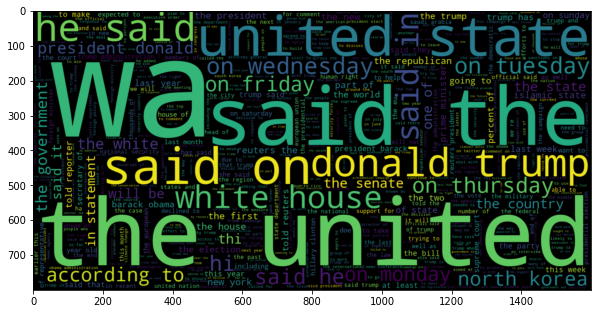

In [37]:
#Text that is true

plt.figure(figsize = (10,7)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 ).generate(" ".join(news[news.category == 'TRUE'].article))
plt.imshow(wc , interpolation = 'bilinear')

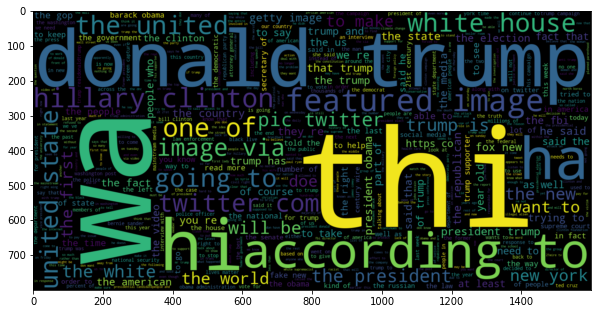

In [38]:
#False news

plt.figure(figsize = (10,7)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 ).generate(" ".join(news[news.category == 'FAKE'].article))
plt.imshow(wc , interpolation = 'bilinear')

In [39]:
#creating a bag of words model

from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bow_text = CountVectorizer().fit(news['article'])

print(len(bow_text.vocabulary_))

140577


In [42]:
text_vect = bow_text.transform(news['article'])

In [43]:
print('Shape of Sparse Matrix:', text_vect.shape)

Shape of Sparse Matrix: (44898, 140577)


In [44]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_vect)
news_tfidf = tfidf_transformer.transform(text_vect)
print(news_tfidf.shape)

(44898, 140577)


DESIGNING AND TRAINIG THE MODEL

In [45]:
#Splitting data into training and testing datasets
from sklearn.model_selection import train_test_split
X = news_tfidf
y = news['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB

fakenews_detector = MultinomialNB().fit(X_train, y_train) 

MODEL PERFORMANCE

In [47]:
#Model Evaluation

predictions = fakenews_detector.predict(X_test)
print(predictions)

['FAKE' 'FAKE' 'TRUE' ... 'TRUE' 'TRUE' 'TRUE']


In [48]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

        FAKE       0.94      0.96      0.95      4661
        TRUE       0.95      0.93      0.94      4319

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

